## This a project that use Logistic Regression to predict the grade of the subject that contain grade which is A,B,C,F

#Import modules

In [45]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the data 


In [46]:
#Load the data
#Load the data
df=pd.read_csv(r'C:\Users\Dell\Downloads\UCCD1004.csv')


In [47]:
#Display the first 7 row of data 
df.head(7)

,Student_ID,Assignment,Midterm1,Midterm2,Quiz,Total CourseWorkmarks,Final Marks,Total Marks,Grade
0,1,20,8,7,4,39,28,67,B
1,2,18,4,7,3,32,24,56,C
2,3,18,7,7,2,34,29,63,B
3,4,15,7,5,1,28,31,59,C
4,5,17,3,7,3,30,29,59,C
5,6,18,9,10,2,39,33,72,B
6,7,13,6,6,3,28,27,55,C


In [48]:
#Count the number of rows and columns in the data set
df.shape

(10000, 9)

In [49]:
#Find the column that consist null value
df.isna().sum()

Student_ID               0
Assignment               0
Midterm1                 0
Midterm2                 0
Quiz                     0
Total CourseWorkmarks    0
Final Marks              0
Total Marks              0
Grade                    0
dtype: int64

In [50]:
df.describe()

,Student_ID,Assignment,Midterm1,Midterm2,Quiz,Total CourseWorkmarks,Final Marks,Total Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,17.035600,6.493500,6.485300,2.993800,33.008200,31.028500,64.036700
std,2886.89568,2.590329,2.280938,2.288298,1.414271,4.395187,5.502883,7.056141
min,1.00000,13.000000,3.000000,3.000000,1.000000,20.000000,22.000000,42.000000
25%,2500.75000,15.000000,5.000000,5.000000,2.000000,30.000000,26.000000,59.000000
50%,5000.50000,17.000000,7.000000,6.000000,3.000000,33.000000,31.000000,64.000000
75%,7500.25000,19.000000,8.000000,8.000000,4.000000,36.000000,36.000000,69.000000
max,10000.00000,21.000000,10.000000,10.000000,5.000000,46.000000,40.000000,85.000000


#Exploratory Data Analysis

In [51]:
#Get a count of the number of each grade
df['Grade'].value_counts()

B    7071
C    2658
A     150
F     121
Name: Grade, dtype: int64

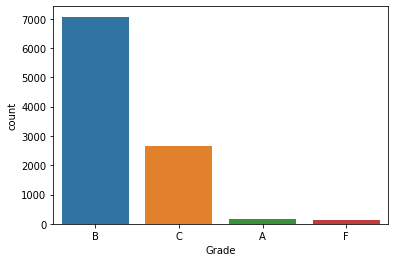

In [52]:
#Visualize the count
sns.countplot(df['Grade'], label='count')

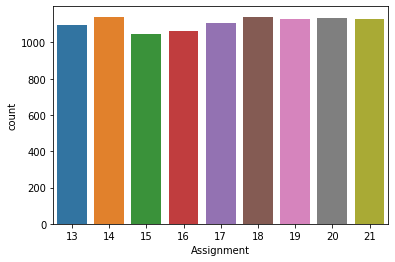

In [53]:
sns.countplot(df['Assignment'], label='count')
plt.show()

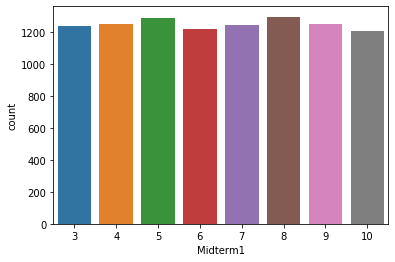

In [54]:
sns.countplot(df['Midterm1'], label='count')
plt.show()

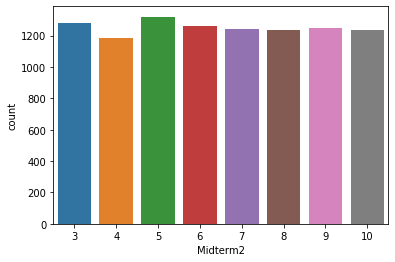

In [55]:
sns.countplot(df['Midterm2'], label='count')
plt.show()

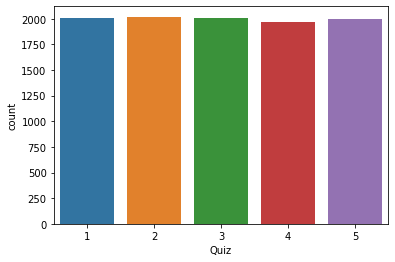

In [56]:
sns.countplot(df['Quiz'], label='count')
plt.show()

#Correlation Matrix

In [57]:
#Get the correlation of the columns
df.iloc[:,0:5].corr()

,Student_ID,Assignment,Midterm1,Midterm2,Quiz
Student_ID,1.000000,-0.012756,0.013821,0.011344,-0.027112
Assignment,-0.012756,1.000000,0.008469,0.002855,0.001698
Midterm1,0.013821,0.008469,1.000000,0.007129,0.002623
Midterm2,0.011344,0.002855,0.007129,1.000000,-0.010659
Quiz,-0.027112,0.001698,0.002623,-0.010659,1.000000


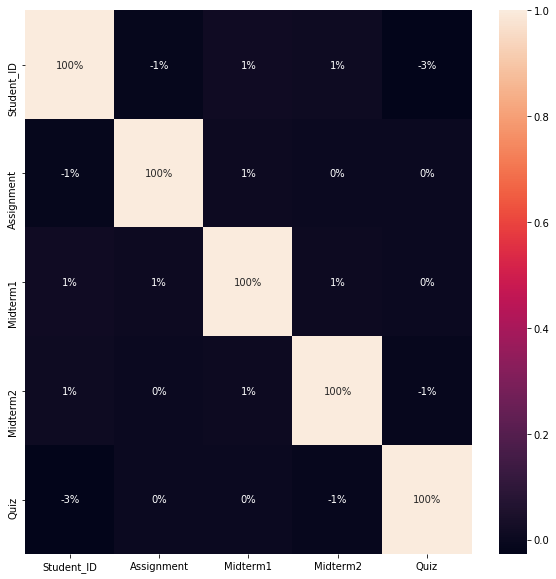

In [58]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:5].corr(), annot=True, fmt='.0%')

#Dropping column that does not related

In [59]:
df.drop(['Student_ID','Total Marks','Total CourseWorkmarks', 'Final Marks'], axis='columns', inplace=True)

In [60]:
df.shape

(10000, 5)

In [61]:
#Print the data after dropping the columns
df.head()

,Assignment,Midterm1,Midterm2,Quiz,Grade
0,20,8,7,4,B
1,18,4,7,3,C
2,18,7,7,2,B
3,15,7,5,1,C
4,17,3,7,3,C


#Label Encoder

In [62]:
#Look at the data types to see which columns need to be encoded
df.dtypes

Assignment     int64
Midterm1       int64
Midterm2       int64
Quiz           int64
Grade         object
dtype: object

In [63]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])


In [73]:
#Print the first 5 rows of the new data  
df.head()

,Assignment,Midterm1,Midterm2,Quiz,Grade
0,20,8,7,4,1
1,18,4,7,3,2
2,18,7,7,2,1
3,15,7,5,1,2
4,17,3,7,3,2


#Splitting the data

In [36]:
X = df.drop(columns=['Grade'])
Y = df['Grade']

In [37]:
#Split the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

#Feature Scaling

In [38]:
#Scale the  data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 72.73333333333333


In [42]:
prediction = model.predict(x_test)
print(prediction)
print(y_test)

[1 2 2 ... 2 1 1]
2424    1
3947    2
6114    2
7757    2
730     2
       ..
1803    2
4216    1
7856    2
6234    1
68      2
Name: Grade, Length: 3000, dtype: int32


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.76      0.93      0.83      2110
           2       0.54      0.26      0.35       804
           3       0.00      0.00      0.00        39

    accuracy                           0.73      3000
   macro avg       0.32      0.30      0.30      3000
weighted avg       0.68      0.73      0.68      3000

0.7273333333333334


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
import pickle 
pickle_out = open("MultipleGrade.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()